In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import scipy.spatial.distance as dt
import math
import scipy.stats as stats

In [2]:
np.random.seed(421)
# sample size
N = 300
# cluster count
K = 5

In [3]:
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = np.genfromtxt("hw07_initial_centroids.csv", delimiter = ",")
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    #if covariances is None:
        #D = spa.distance_matrix(centroids, X)
        #memberships = np.argmin(D, axis = 0)
        #return np.argmin(D, axis = 0)
    
    #memberships = np.array([np.argmax([score_func(y, centroids[i], covariances[i], priors[i]) for i in range(K)]) for y in X])
    #for i in range(300):
        #memberships[i] = getResult(X[i])
    D = spa.distance_matrix(centroids, X)
    #find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

In [4]:
data_set = np.genfromtxt("hw07_data_set.csv", delimiter = ",")
X = data_set

In [5]:
centroids = np.genfromtxt("hw07_initial_centroids.csv", delimiter = ",")

In [6]:
def score_func(x,means,cova,count):
    #result = np.sum((-1*np.log(2*math.pi)) - (0.5*np.log(np.linalg.det(cova))) - 0.5*(np.dot(np.array(x-means).T, np.linalg.inv(cova))*(x-means))) + (count)
    result = stats.multivariate_normal.pdf(x, means, cova) * (count)
    return result

In [7]:
def getResult(x):
    maxPt=0
    mex=score_func(x, centroids[0], covariances[0], priors[0])
    for i in range(K):
        if(score_func(x, centroids[i], covariances[i], priors[i]) > mex):
            maxPt=i
            mex=score_func(x, centroids[i], covariances[i], priors[i])
    return maxPt

In [8]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")

In [9]:
#memberships

In [10]:
#i = 3

In [11]:
#centroids[i], covariances[i], priors[i]

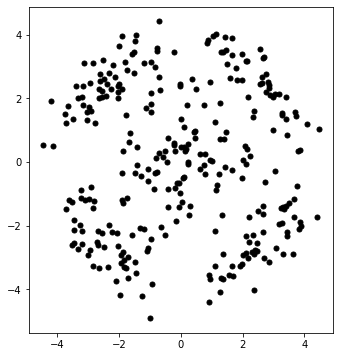

In [12]:
plt.figure(figsize = (12, 6))    
plt.subplot(1, 2, 1)
plt.plot(X[:,0],X[:,1],"k.", markersize = 10)

In [13]:
#priors = np.array([np.count_nonzero(memberships == i) for i in range(K)]) / N

In [14]:
#covariances = [np.cov(data_set[memberships == i].T) for i in range(K)]

In [15]:
memberships = update_memberships(centroids, X)
priors = np.array([np.count_nonzero(memberships == i) for i in range(K)]) / N
covariances = [np.cov(data_set[memberships == i].T) for i in range(K)]
    
old_centroids = centroids
centroids = update_centroids(memberships, X)

In [16]:
iteration = 1
hik = np.zeros(shape=(300,5), dtype=float)
while iteration <= 100:
    print("Iteration#{}:".format(iteration))
    # E step
    memberships = np.array([np.argmax([score_func(y, centroids[i], covariances[i], priors[i]) for i in range(K)]) for y in X])
    #for i in range(300):
     #   memberships[i] = getResult(X[i])
    for i in range(300):
        hik[i, 0] = score_func(X[i], centroids[0], covariances[0], priors[0]) 
        hik[i, 1] = score_func(X[i], centroids[1], covariances[1], priors[1])
        hik[i, 2] = score_func(X[i], centroids[2], covariances[2], priors[2])
        hik[i, 3] = score_func(X[i], centroids[3], covariances[3], priors[3])
        hik[i, 4] = score_func(X[i], centroids[4], covariances[4], priors[4])
    # M step
    
    #centroids = update_centroids(memberships, X)
    #priors = np.array([np.count_nonzero(memberships == i) for i in range(K)]) / N
    #covariances = [np.cov(data_set[memberships == i].T) for i in range(K)]
    # M step
    
    
    centroids = np.vstack([hik[:, k].dot(X) / np.sum(hik[:, k]) for k in range(K)])
    priors = np.array([np.count_nonzero(memberships == i) for i in range(K)]) / N
    covariances = [np.cov(data_set[memberships == i].T) for i in range(K)]
    #covariances = [np.sum(hik[n, k] * np.outer(X[n] - centroids[k], X[n] - centroids[k]) for n in range(N)) for k in range(K)]
    
    #centroids = np.vstack([np.matmul(X[:].T, hik[:, i]) / np.sum(hik[:, i]) for i in range(K)])
    
    
    
    #centroids = np.vstack([np.matmul(X[:].T, hik[:, i]) / np.sum(hik[:, i]) for i in range(K)])
    #priors = [np.sum(hik[:, i]) for i in range(K)] / np.sum(hik)
    #covariances = [np.sum(hik[:, k] * np.matmul(X[:] - centroids[k], np.array(X[:] - centroids[k]).T)) / np.sum(hik[:, k]) for k in range(K)] 
    

    #old_memberships = memberships
    #memberships = update_memberships(centroids, X)
    #priors = np.array([np.count_nonzero(memberships == i) for i in range(K)]) / N
    #covariances = [np.cov(data_set[memberships == i].T) for i in range(K)]
    #centroids = update_centroids(memberships, X)
    

    iteration = iteration + 1

Iteration#1:
Iteration#2:
Iteration#3:
Iteration#4:
Iteration#5:
Iteration#6:
Iteration#7:
Iteration#8:
Iteration#9:
Iteration#10:
Iteration#11:
Iteration#12:
Iteration#13:
Iteration#14:
Iteration#15:
Iteration#16:
Iteration#17:
Iteration#18:
Iteration#19:
Iteration#20:
Iteration#21:
Iteration#22:
Iteration#23:
Iteration#24:
Iteration#25:
Iteration#26:
Iteration#27:
Iteration#28:
Iteration#29:
Iteration#30:
Iteration#31:
Iteration#32:
Iteration#33:
Iteration#34:
Iteration#35:
Iteration#36:
Iteration#37:
Iteration#38:
Iteration#39:
Iteration#40:
Iteration#41:
Iteration#42:
Iteration#43:
Iteration#44:
Iteration#45:
Iteration#46:
Iteration#47:
Iteration#48:
Iteration#49:
Iteration#50:
Iteration#51:
Iteration#52:
Iteration#53:
Iteration#54:
Iteration#55:
Iteration#56:
Iteration#57:
Iteration#58:
Iteration#59:
Iteration#60:
Iteration#61:
Iteration#62:
Iteration#63:
Iteration#64:
Iteration#65:
Iteration#66:
Iteration#67:
Iteration#68:
Iteration#69:
Iteration#70:
Iteration#71:
Iteration#72:
I

In [17]:
class_means = np.array([[+2.5, +2.5], [-2.5, +2.5], [-2.5, -2.5], [+2.5, -2.5], [0, 0]])
class_deviations = np.array([[[+0.8, -0.6], [-0.6, +0.8]], [[+0.8, +0.6], [+0.6, +0.8]], [[+0.8, -0.6], [-0.6, +0.8]],
                             [[+0.8, +0.6], [+0.6, +0.8]], [[+1.6, 0], [0, +1.6]]])
class_sizes = np.array([50, 50, 50, 50, 100])

In [19]:
#k = 0
#(np.matmul(np.array(X[:] - centroids[k])[:].reshape(300,2), np.array(X[:] - centroids[k])[:].reshape(2,300)))

In [20]:
#hik[:, 0]* np.matmul(X[:] - centroids[0], np.array(X[:] - centroids[0]).T)

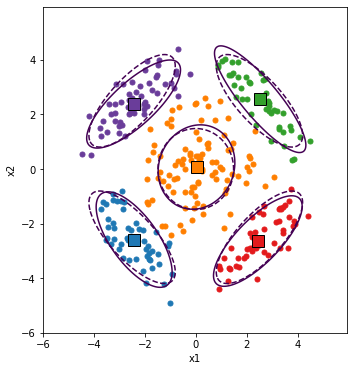

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plot_current_state(centroids, memberships, X)

x, y = np.mgrid[-6 : 6 : 0.05, -6 : 6 : 0.05]
coordinates = np.empty(x.shape + (2,))
coordinates[:, :, 0] = x
coordinates[:, :, 1] = y
for i in range(K):
    pred = stats.multivariate_normal(class_means[i], class_deviations[i])
    real = stats.multivariate_normal(centroids[i], covariances[i])
    plt.contour(x, y, pred.pdf(coordinates), levels=[0.05], linestyles='dashed')
    plt.contour(x, y, real.pdf(coordinates), levels=[0.05])
plt.show()